Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#loading data to dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#getting some information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
correlation=gold_data.drop('Date', axis=1).corr()        #here date column is also present so string value can't be allowed that's why this is taken

<Axes: >

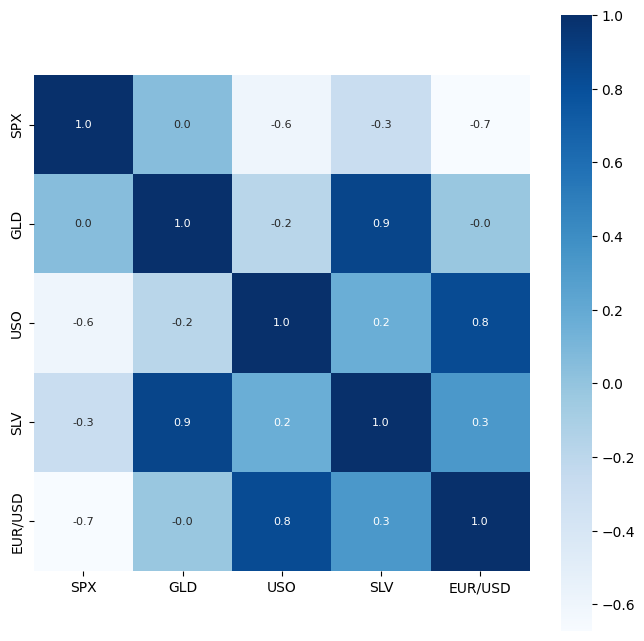

In [ ]:
#constructing the heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-18-2105778116.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

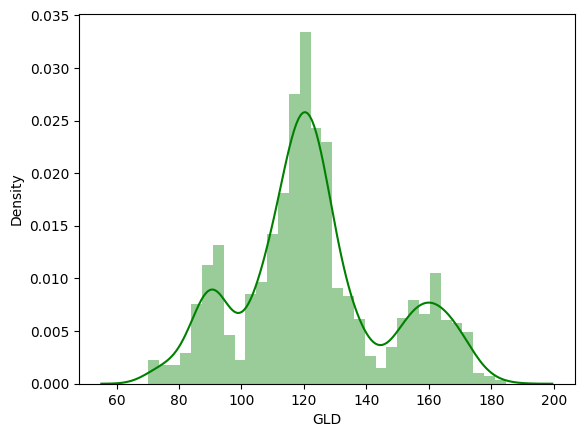

In [18]:
#CHECKING THE DISTRIBUTION OF THE GLD PRICE
sns.distplot(gold_data['GLD'],color='green')

SPLITTING THE FEATURES AND THE TARGET

In [19]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


SPLITTING INTO TRAINING AND TEST DATA

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

MODEL TRAINING

RANDOM FOREST MODEL



In [23]:
regressor=RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [25]:
#prediction oon test data
test_data_prediction=regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.60909927  82.07       115.95850032 127.60410098 120.69180124
 154.74439804 150.3712985  126.13310044 117.54639879 125.89920087
 116.73450087 172.04650101 141.72509836 167.52219818 115.0509998
 117.52430047 137.53350403 169.88340067 159.83500393 158.98300025
 155.25440071 125.06169983 175.62419962 157.30110368 125.28670029
  93.64929991  77.87659996 120.56140008 119.0411992  167.49780011
  88.03540061 125.32540036  91.17540079 117.56020077 121.09269923
 135.86560032 115.3841013  115.48600093 149.31100008 107.25960056
 104.14560226  87.11319794 126.51100042 117.60179973 153.56049879
 119.65220004 108.38150022 108.17139817  93.15200043 127.22449727
  75.06010044 113.6297991  121.41559993 111.33059906 118.80559884
 120.8932996  158.76379969 168.27210052 147.02689726  86.00289863
  94.2153006   86.87029883  90.41919999 119.00020068 126.33720072
 127.56820035 169.48240015 122.24679931 117.29419888  98.29580047
 168.65860096 143.06639821 132.31150237 121.08110213 121.34719945
 119.638700

In [27]:
#r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9893824683838547


COMPARE THE ACTUAL VALUE AND PREDICTED VALUE

In [28]:
Y_test=list(Y_test)

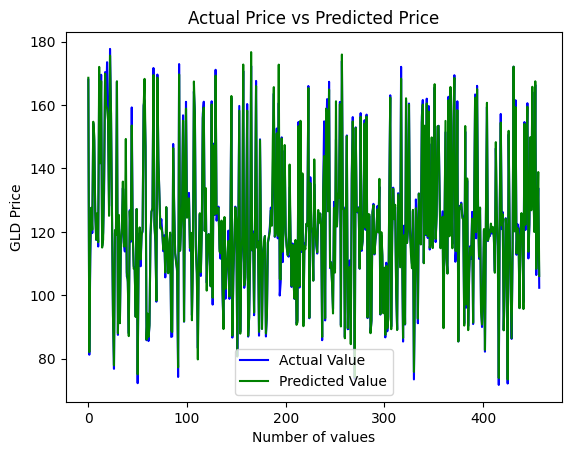

In [31]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()